# 📖 Import Library 

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For scaling numerical features
from sklearn.linear_model import LogisticRegression  # The logistic regression model
from sklearn.metrics import classification_report, accuracy_score  # For model evaluation

# 💻 Load in data

In [4]:
df=pd.read_csv('../datasets/poker_completed.csv')

In [5]:
df.columns

Index(['game_id', 'hand_id', 'round', 'player_name', 'action', 'amount',
       'hole_cards', 'community_cards', 'pot', 'player_stack', 'small_blind',
       'big_blind', 'winner', 'card1', 'card2', 'card1_suit', 'card1_rank',
       'card2_suit', 'card2_rank', 'community1_rank', 'community1_suit',
       'community2_rank', 'community2_suit', 'community3_rank',
       'community3_suit', 'community4_rank', 'community4_suit',
       'community5_rank', 'community5_suit', 'poker_hand', 'bet_to_pot_ratio',
       'action_label', 'round_label'],
      dtype='object')

In [6]:
df.shape

(8863, 33)

In [7]:
# Set up X
X = df[['round_label','pot', 'player_stack', 
        'poker_hand', 'card1_rank', 'card2_rank','card2_suit','card1_suit','community1_rank', 
        'community2_rank', 'community3_rank', 'community4_rank', 
        'community5_rank','community1_suit', 'community2_suit', 'community3_suit', 
        'community4_suit', 'community5_suit']]

y = df['action_label']  # Target variable

# Train & Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Train and evaluate
log_reg = LogisticRegression(max_iter=100, random_state=42)
log_reg.fit(X_train_scaled, y_train)  
y_pred = log_reg.predict(X_test_scaled)  

# Display results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.4173716864072194
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.23      0.26       622
           1       0.46      0.69      0.55       737
           2       0.43      0.21      0.29       414

    accuracy                           0.42      1773
   macro avg       0.40      0.38      0.37      1773
weighted avg       0.40      0.42      0.39      1773



In [8]:
# Check training and testing scores
print(log_reg.score(X_train_scaled, y_train))  # Training accuracy
print(log_reg.score(X_test_scaled, y_test))    # Testing accuracy

0.4227080394922426
0.4173716864072194


## 📝 Summarizes the performance of a Logistic Regression model on a multi-class classification

1. **Overall Accuracy:** The Logistic Regression model achieves an accuracy of **42%**.

2. **Action Performance:**
- **Class 0 (Call)**:
  - The model struggles to identify calls (24% recall), meaning it misses many "Call" situations. Precision is also low (32%), so when it predicts "Call," it's not always correct.
  
- **Class 1 (Raise)**:
  - The model does better with "Raise," correctly identifying 69% of the true raises (high recall) and 46% of the time, when it predicts "Raise," it's correct (precision). The F1-score of 55% shows a good balance here.

- **Class 2 (Fold)**:
  - For "Fold," the model also struggles (21% recall). While the precision is 43%, it doesn't effectively detect the true "Fold" situations, as indicated by the low recall.

### Strategy to improve:

- **Model Choice**: Logistic Regression may not be the best for this problem. I will try more complex models like **Neural Network** and **XGBoost**, which can capture more complex patterns.
- **Hyperparameter Tuning**: Adjust the learning rate, regularization, and other parameters to see if it improves performance.

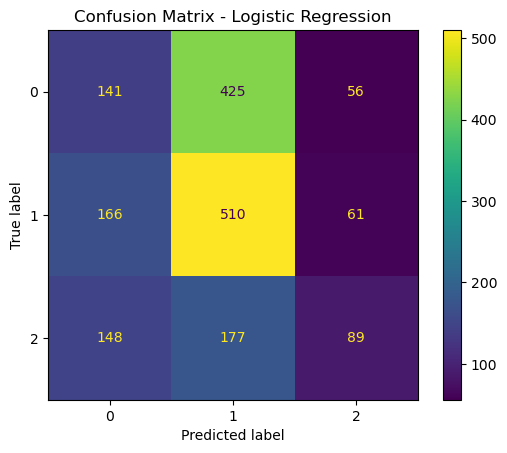

In [12]:
# Compute the confusion matrix
# 0 = call , 1 = raise, 3 = fold

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='viridis', values_format='d')

# Add a title for clarity
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

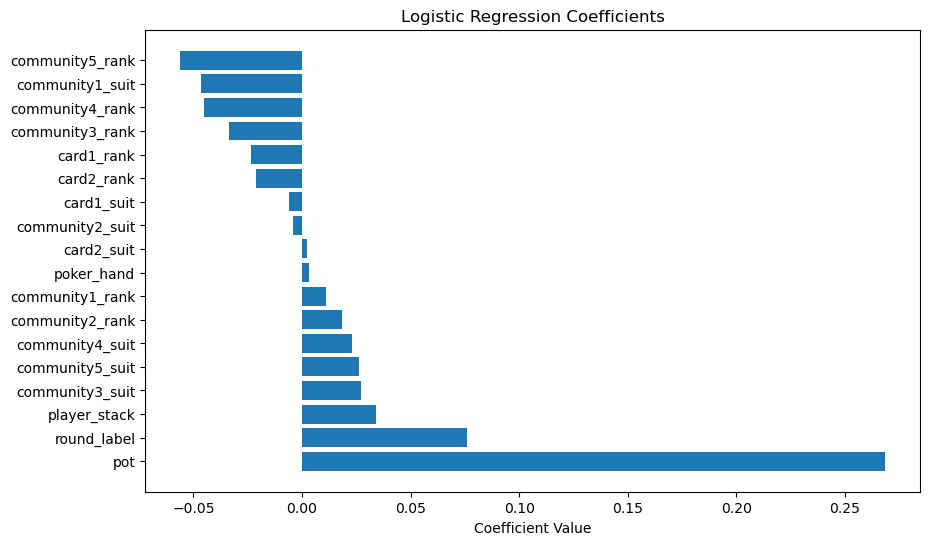

In [13]:
# Coefficients
coefficients = log_reg.coef_[0]  
features = X.columns  

# Make # DF for easier handling
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')

plt.savefig('../images/Logistic_Regression_Coefficients.png', format='png', dpi=300)
plt.show()

In [14]:
coef_df.round(2)

,Feature,Coefficient
1,pot,0.27
0,round_label,0.08
2,player_stack,0.03
15,community3_suit,0.03
17,community5_suit,0.03
16,community4_suit,0.02
9,community2_rank,0.02
8,community1_rank,0.01
3,poker_hand,0.00
6,card2_suit,0.00


## 📝 Understand the coefficients from the Logistic Regression model, indicating how each feature influences the target variable (`action_label`).

- Positive coefficients like **pot**, **round_label**, and **player_stack** suggest that larger pots, later rounds, and bigger stacks lead to more aggressive actions (e.g., **Raise**).
- Negative coefficients for the **community card ranks** and **suits** suggest that certain community cards (especially higher-ranked ones) may discourage aggressive moves and lead to more cautious play.

The coefficients indicate that the model is learning that hand strength and certain community card characteristics play a role in decision-making, but the influence of these features is relatively small compared to others like the pot size and round label.